In [1]:
from joblib import dump, load
import numpy as np

In [2]:
x_train = load('x_train_ecfp4.pkl')
x_test = load('x_test_ecfp4.pkl')
x_valid = load('x_valid_ecfp4.pkl')

In [3]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [4]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [11]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [12]:
seed = 42

In [13]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
param_grid = {'n_estimators': np.arange(100, 600, 100),
             'learning_rate': np.arange(0.001, 0.1, 0.001)}

In [151]:
gbdt = GridSearchCV(GradientBoostingClassifier(random_state=seed), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)


In [152]:
gbdt.fit(x_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Fitting 10 folds for each of 495 candidates, totalling 4950 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1760 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2410 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 3160 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4010 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 4950 out of 4950 | elapsed: 36.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,...
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0

In [153]:
gbdt.best_params_

{'learning_rate': 0.059000000000000004, 'n_estimators': 500}

In [154]:
gbdt.best_score_

0.7794117647058825

In [74]:
gbdt.cv_results_['mean_test_score']

array([0.75882353, 0.76470588, 0.76176471, 0.76764706, 0.77058824,
       0.76764706, 0.76764706, 0.76764706, 0.76764706, 0.76176471,
       0.76470588])

In [75]:
gbdt.cv_results_['params']

[{'n_estimators': 200},
 {'n_estimators': 210},
 {'n_estimators': 220},
 {'n_estimators': 230},
 {'n_estimators': 240},
 {'n_estimators': 250},
 {'n_estimators': 260},
 {'n_estimators': 270},
 {'n_estimators': 280},
 {'n_estimators': 290},
 {'n_estimators': 300}]

In [242]:
gbdt_2c8 = GradientBoostingClassifier(random_state=seed, n_estimators=300, learning_rate=0.01, max_depth=5)

In [243]:
gbdt_2c8.fit(x_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [24]:
matthews = make_scorer(matthews_corrcoef)
specificity = make_scorer(recall_score, pos_label=0)

In [225]:
cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean()

0.7823529411764707

In [226]:
cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

0.8375501253132832

In [227]:
cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring=matthews).mean()

0.5532199023212488

In [228]:
cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring='recall').mean()

0.8489473684210527

In [229]:
cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring=specificity).mean()

0.689047619047619

In [230]:
y_pred = gbdt_2c8.predict(x_test_scaled)

In [231]:
accuracy_score(y_test, y_pred)

0.7757009345794392

In [232]:
roc_auc_score(y_test, gbdt_2c8.decision_function(x_test_scaled))

0.8298226164079823

In [233]:
matthews_corrcoef(y_test, y_pred)

0.53024968623889

In [234]:
recall_score(y_test, y_pred)

0.803030303030303

In [235]:
recall_score(y_test, y_pred, pos_label=0)

0.7317073170731707

In [41]:
import matplotlib.pyplot as plt

0.7823529411764707 2
0.822429906542056 5


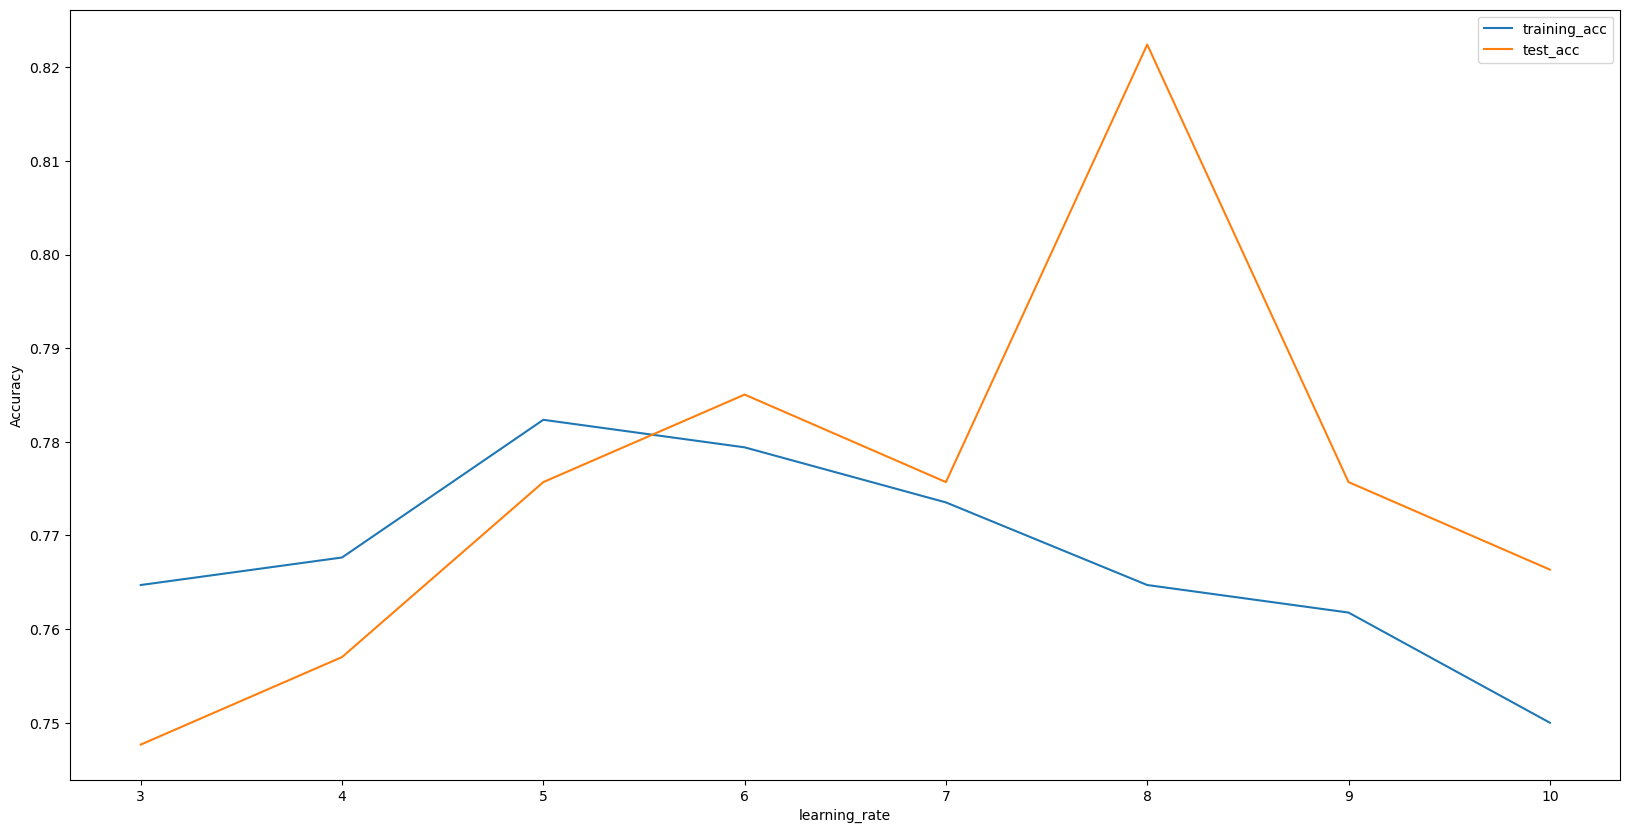

In [222]:
training_acc = []
test_acc = []

for i in np.arange(3, 11, 1):
    gbdt_2c8 = GradientBoostingClassifier(random_state=seed, n_estimators=300, learning_rate=0.01, max_depth=i)
    gbdt_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(gbdt_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = gbdt_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc))))
print(max(test_acc),(test_acc.index(max(test_acc))))
plt.figure(figsize=(20, 10))
plt.plot(np.arange(3, 11, 1), training_acc, label="training_acc")
plt.plot(np.arange(3, 11, 1), test_acc, label="test_acc")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
xticks = np.arange(3, 11, 1)
plt.xticks(xticks)
plt.legend()

In [244]:
y_pred_valid = gbdt_2c8.predict(x_valid_scaled)

In [245]:
accuracy_score(y_valid, y_pred_valid)

0.7674418604651163

In [246]:
roc_auc_score(y_valid, gbdt_2c8.decision_function(x_valid_scaled))

0.8608837970540097

In [247]:
matthews_corrcoef(y_valid, y_pred_valid)

0.5300173363804058

In [248]:
recall_score(y_valid, y_pred_valid)

0.851063829787234

In [249]:
recall_score(y_valid, y_pred_valid, pos_label=0)

0.6666666666666666

In [250]:
dump(gbdt_2c8, '2c8_ecfp4_gbdt.pkl', compress=3)

['2c8_ecfp4_gbdt.pkl']